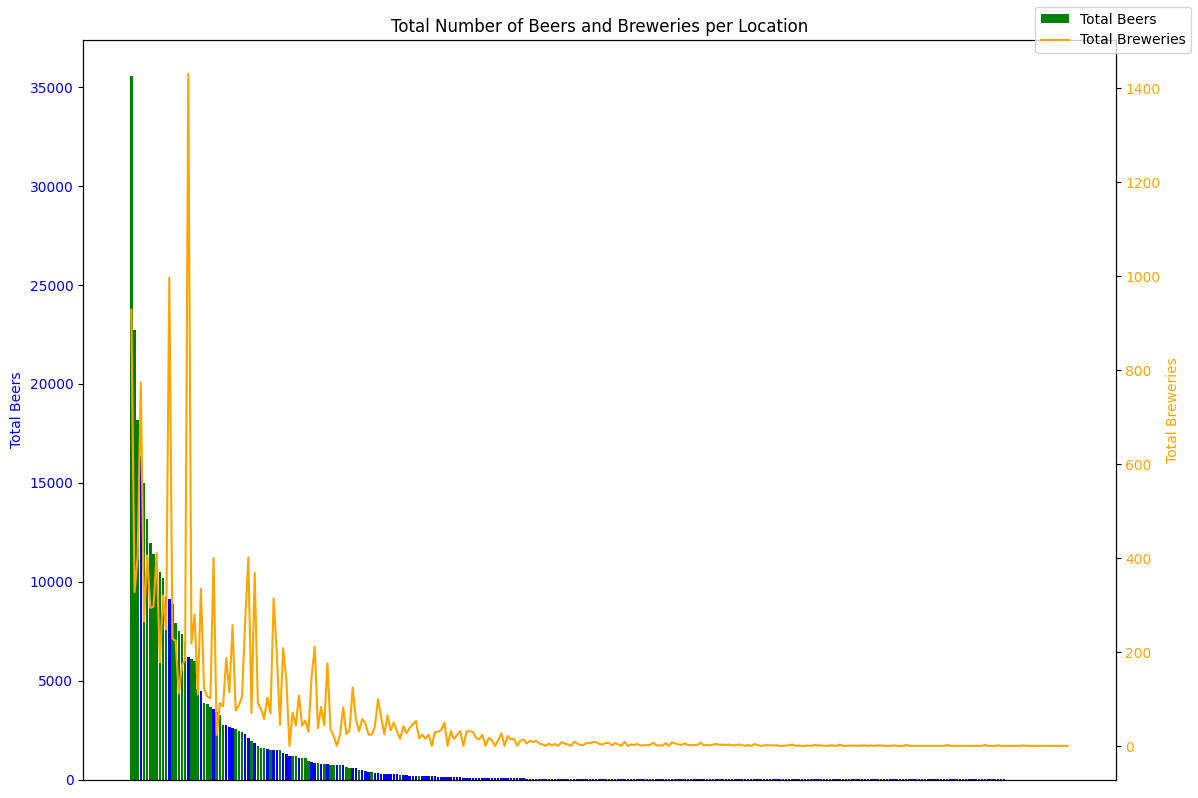

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Number of beers per location
breweries = pd.read_csv('minimizedData/BA_breweries_small.csv')

# Calculating the number of beers and breweries produced by each location
country_stats = breweries.groupby('location').agg(
    total_breweries=('id', 'nunique'),
    total_beers=('nbr_beers', 'sum')
).reset_index()

# Plotting the total number of beers and breweries for each location
country_stats = country_stats.sort_values(by='total_beers', ascending=False)
fig, ax1 = plt.subplots(figsize=(12, 8))

bar_colors = ['green' if country.startswith('United States,') else 'blue' for country in country_stats['location']]

# Bar plot for total beers
bars = ax1.bar(country_stats['location'], country_stats['total_beers'], color=bar_colors, label='Total Beers')
ax1.set_ylabel('Total Beers', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

plt.xticks([])  # Remove x-tick labels for clarity

# Overlay line plot for total breweries
ax2 = ax1.twinx()
line, = ax2.plot(country_stats['location'], country_stats['total_breweries'], color='orange', label='Total Breweries')
ax2.set_ylabel('Total Breweries', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add a combined legend
fig.legend([bars, line], ['Total Beers', 'Total Breweries'], loc='upper right')

# Adjust layout and save the plot

plt.title('Total Number of Beers and Breweries per Location')
plt.tight_layout()
plt.savefig("modules/1.png")
